In [1]:
# Written by Vamei, http://www.cnblogs.com/vamei/
# Feel free to use or modify this script.

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

#============================================# read data
names = []
pops  = []
lats  = []
lons  = []
countries = []
for line in file("../data/major_city"):
    info = line.split()
    names.append(info[0])
    pops.append(float(info[1]))
    lat  = float(info[2][:-1])
    if info[2][-1] == 'S': lat = -lat
    lats.append(lat)
    lon  = float(info[3][:-1])
    if info[3][-1] == 'W': lon = -lon + 360.0
    lons.append(lon)
    country = info[4]
    countries.append(country)

#============================================
# set up map projection with
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=35,lon_0=120,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='#689CD2')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# Fill continent wit a different color
map.fillcontinents(color='#BF9E30',lake_color='#689CD2',zorder=0)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons, lats)
max_pop = max(pops)
# Plot each city in a loop.
# Set some parameters
size_factor = 80.0
y_offset    = 15.0
rotation    = 30
for i,j,k,name in zip(x,y,pops,names):
    size = size_factor*k/max_pop
    cs = map.scatter(i,j,s=size,marker='o',color='#FF5600')
    plt.text(i,j+y_offset,name,rotation=rotation,fontsize=10)

plt.title('Major Cities in Asia & Population')
plt.show()

ImportError: No module named basemap

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = range(0,20)
print t
plt.plot(t,np.cos(t), color ='blue', linewidth=2.5, linestyle="--")
plt.scatter(t,np.cos(t), 50, color ='blue')
plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),arrowprops=dict(facecolor='blue', shrink=0.03))
"""
plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t,t],[0,np.sin(t)], color ='red', linewidth=2.5, linestyle="--")
plt.scatter([t,],[np.sin(t),], 50, color ='red')

plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
"""

plt.grid()
plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


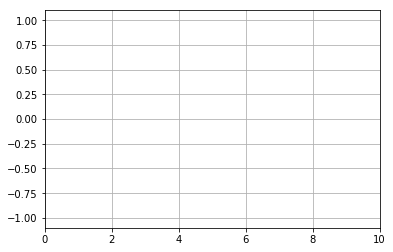

In [19]:
# 官方画图集锦：http://matplotlib.org/gallery.html，函数集锦：http://matplotlib.org/examples/index.html
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def data_gen(t=0):
    cnt = 0
    while cnt < 1000:
        cnt += 1
        t += 0.1
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=10,
                              repeat=False, init_func=init)
plt.show()#静态图

# js中显示动图
from IPython.display import HTML
HTML(ani.to_jshtml())

In [43]:
import random
a= [5,8,1]
random.choice(a)
random.random()
print(random.shuffle(a))

None


c:\program files (x86)\python\lib\site-packages\matplotlib\patches.py:91: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


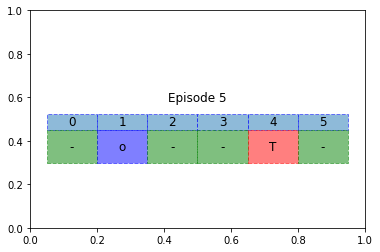

In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
#因为update的参数是调用函数data_gen,所以第一个默认参数不能是framenum
def update(data):
    #line.set_ydata(data)
    line.draw(data)
    return line,

# 每次生成10个随机数据
def data_gen():
    #raw_list = ['-', 'o', '-', '-', 'T', '-']
#     while True:
#         yield np.random.rand(10)
    for item in data:
        yield item
        
# if __name__ == '__main__':
data = [['-', 'o', '-', '-', 'T', '-'],
        ['-', '-', 'o', '-', 'T', '-'],
        ['-', '-', '-', 'o', 'T', '-']]
fig = plt.figure()
ax = fig.add_subplot(111)
#line, = ax.plot([])
# plt.grid()
icon_list = ['-', 'o', '-', '-', 'T', '-']
#def draw(icon_list, ax):
list_len = len(icon_list)
delta = 0.9/list_len
color_dict = {'-':'g', 'o':'b', 'T':'r'}
start_point = (0.05, 0.05)
plt.text(0.5, 0.6, 'Episode 5', horizontalalignment='center',  fontsize=12,
        verticalalignment='center', transform=ax.transAxes)
for idx, item in enumerate(icon_list):
    color_value = color_dict[item]
    end_point = (start_point[0]+idx*delta, 0.3)
    ax.add_patch(plt.Rectangle((end_point[0], end_point[1]+delta), delta, delta*0.5, 
        linestyle='--', edgecolor='b', linewidth=1, alpha=0.5))
    plt.text(end_point[0]+0.5*delta, end_point[1]+1.25*delta, idx, horizontalalignment='center',  fontsize=12,
        verticalalignment='center', transform=ax.transAxes)
    ax.add_patch(plt.Rectangle(end_point, delta, delta, 
        color='%s'%(color_value), linestyle='--', edgecolor='y', linewidth=1, alpha=0.5)) #, fill=None
    plt.text(end_point[0]+0.5*delta, end_point[1]+0.5*delta, item, horizontalalignment='center',  fontsize=12,
        verticalalignment='center', transform=ax.transAxes)

# draw(icon_list, ax)
#ani = animation.FuncAnimation(fig, update, data_gen, interval=2*1000)
#ani = animation.ArtistAnimation(fig, data, interval=50, repeat_delay=3000, blit=True)
plt.show()

# from IPython.display import HTML
# HTML(ani.to_jshtml())

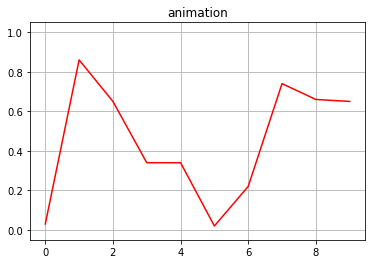

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
start = [1, 0.18, 0.63, 0.29, 0.03, 0.24, 0.86, 0.07, 0.58, 0]
 
metric =[[0.03, 0.86, 0.65, 0.34, 0.34, 0.02, 0.22, 0.74, 0.66, 0.65],
         [0.43, 0.18, 0.63, 0.29, 0.03, 0.24, 0.86, 0.07, 0.58, 0.55],
         [0.66, 0.75, 0.01, 0.94, 0.72, 0.77, 0.20, 0.66, 0.81, 0.52]
        ]
 
fig = plt.figure()
window = fig.add_subplot(111)
ax, = window.plot(start, color='r')
plt.title('animation')
plt.grid()
#如果是参数是list,则默认每次取list中的一个元素,即metric[0],metric[1],...
def update(data): # 用于更新数据
    ax.set_ydata(data)
    return ax,
# 传入多个参数
ani = animation.FuncAnimation(fig, update, metric, interval=0.5*1000)
#plt.show()
# js动态显示动画
from IPython.display import HTML
HTML(ani.to_jshtml())

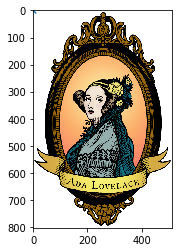

In [2]:
"""
Simple demo of the imshow function.
"""
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

image_file = cbook.get_sample_data('ada.png')
image = plt.imread(image_file)

plt.imshow(image)
#plt.axis('off')  # clear x- and y-axes
plt.plot(range(10),range(10))
plt.show()

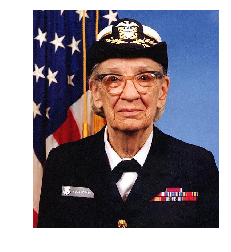

In [3]:
"""
Demo of image that's been clipped by a circular patch.
"""
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cbook as cbook


image_file = cbook.get_sample_data('grace_hopper.png')
image = plt.imread(image_file)

fig, ax = plt.subplots()
im = ax.imshow(image)
patch = patches.Circle((260, 200), radius=200, transform=ax.transData)
#im.set_clip_path(patch)

plt.axis('off')
plt.show()

c:\program files (x86)\python\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


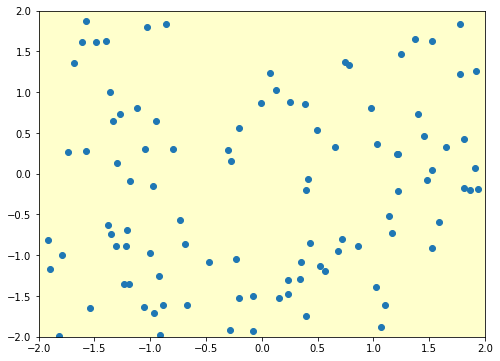

In [4]:
#!/usr/bin/env python

from matplotlib.widgets import Cursor
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, axisbg='#FFFFCC')

x, y = 4*(np.random.rand(2, 100) - .5)
ax.plot(x, y, 'o')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# set useblit = True on gtkagg for enhanced performance
cursor = Cursor(ax, useblit=True, color='red', linewidth=2)

plt.show()

c:\program files (x86)\python\lib\site-packages\matplotlib\__init__.py:1717: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


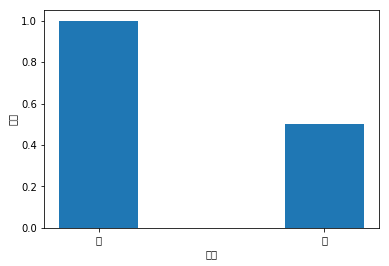

In [5]:
# 中文显示，失败,参考：http://www.pythoner.com/200.html
import matplotlib.pyplot as plt 
plt.xlabel(u'性别')
plt.ylabel(u'人数')
plt.xticks((0,1),(u'男',u'女'))
plt.bar(left = (0,1),height = (1,0.5),width = 0.35,align="center")
plt.show()

In [7]:
# pyhon GUI工具
#import Tkinter as tk
#mylabel = tk.Label(tk.Tk(),text='hello');
from Tkinter import *
mylabel = Label(Tk(),text='hello');
mylabel.grid()
print('hello')

ModuleNotFoundError: No module named 'Tkinter'